In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [3]:
churn_df = pd.read_csv(r'E:\Work_files\Unified_assignment\churn (1).csv')

In [4]:
churn_df.head(10)

,Unnamed: 0,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,?,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,?,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,?,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False.
6,6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,?,1.92,0,False.
8,8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,?,1,False.
9,9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [5]:
churn_df = churn_df.replace('?',np.nan)

In [6]:
churn_df.isnull().sum()

Unnamed: 0          0
State               0
Account Length      0
Area Code         173
Phone               0
Int'l Plan        528
VMail Plan        349
VMail Message       0
Day Mins            0
Day Calls           0
Day Charge        112
Eve Mins           88
Eve Calls         520
Eve Charge          0
Night Mins          0
Night Calls         0
Night Charge      310
Intl Mins           0
Intl Calls        662
Intl Charge       352
CustServ Calls      0
Churn?              0
dtype: int64

In [7]:
# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    
    return dataset.dtypes


check_datatypes(churn_df)

Unnamed: 0          int64
State              object
Account Length      int64
Area Code          object
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge         object
Eve Mins           object
Eve Calls          object
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge       object
Intl Mins         float64
Intl Calls         object
Intl Charge        object
CustServ Calls      int64
Churn?             object
dtype: object

### Deal with missing values

In [8]:
churn_df['Area Code'] = churn_df['Area Code'].astype('float64')

In [9]:
churn_df['Area Code'] = churn_df['Area Code'].fillna(churn_df['Area Code'].mean())

In [10]:
churn_df['Day Charge'] = churn_df['Day Charge'].astype('float64')

In [11]:
churn_df['Day Charge'] = churn_df['Day Charge'].fillna(churn_df['Day Charge'].mean())

In [12]:
churn_df['Eve Mins'] = churn_df['Eve Mins'].astype('float64')

In [13]:
churn_df['Eve Mins'] = churn_df['Eve Mins'].fillna(churn_df['Eve Mins'].mean())

In [14]:
churn_df['Eve Calls'] = churn_df['Eve Calls'].astype('float64')

In [15]:
churn_df['Eve Calls'] = churn_df['Eve Calls'].fillna(churn_df['Eve Calls'].mean())

In [16]:
churn_df['Night Charge'] = churn_df['Night Charge'].astype('float64')

In [17]:
churn_df['Night Charge'] = churn_df['Night Charge'].fillna(churn_df['Night Charge'].mean())

In [18]:
churn_df['Intl Calls'] = churn_df['Intl Calls'].astype('float64')

In [19]:
churn_df['Intl Calls'] = churn_df['Intl Calls'].fillna(churn_df['Intl Calls'].mean())

In [20]:
churn_df['Intl Charge'] = churn_df['Intl Charge'].astype('float64')

In [21]:
churn_df['Intl Charge'] = churn_df['Intl Charge'].fillna(churn_df['Intl Charge'].mean())

In [22]:
churn_df.isnull().sum()

Unnamed: 0          0
State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        528
VMail Plan        349
VMail Message       0
Day Mins            0
Day Calls           0
Day Charge          0
Eve Mins            0
Eve Calls           0
Eve Charge          0
Night Mins          0
Night Calls         0
Night Charge        0
Intl Mins           0
Intl Calls          0
Intl Charge         0
CustServ Calls      0
Churn?              0
dtype: int64

In [23]:
churn_df["Int\'l Plan"] = churn_df["Int\'l Plan"].fillna("NA")

In [24]:
churn_df["VMail Plan"] = churn_df["VMail Plan"].fillna("NA")

In [25]:
churn_df.isnull().sum()

Unnamed: 0        0
State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [26]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(churn_df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

Numeric Features:
   Unnamed: 0  Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
0           0             128      415.0             25     265.1        110   
1           1             107      415.0             26     161.6        123   
2           2             137      415.0              0     243.4        114   
3           3              84      408.0              0     299.4         71   
4           4              75      415.0              0     166.7        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0    30.56588     197.4       99.0       16.78       244.7           91   
1    30.56588     195.5      103.0       16.62       254.4          103   
2    30.56588     121.2      110.0       10.30       162.6          104   
3    50.90000      61.9       88.0        5.26       196.9           89   
4    28.34000     148.3      122.0       12.61       186.9          121   

   Night Charge  Intl Mins  Intl Calls  Intl Charg

In [27]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(churn_df)
print("Categorical Features:")
print(categorical_columns)


Categorical Features:
  State     Phone Int'l Plan VMail Plan  Churn?
0    KS  382-4657         no        yes  False.
1    OH  371-7191         no        yes  False.
2    NJ  358-1921         no         no  False.
3    OH  375-9999        yes         no  False.
4    OK  330-6626        yes         no  False.


### Check class imbalance

In [28]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(churn_df['Churn?'])

False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

#### Observation: 
The class distribution in the target is ~85:14. This is a clear indication of imbalance.

### Detect outliers 

In [29]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(churn_df)

,Feature,Number of Outliers
0,Unnamed: 0,0
1,Account Length,18
2,Area Code,789
3,VMail Message,1
4,Day Mins,25
5,Day Calls,23
6,Day Charge,33
7,Eve Mins,34
8,Eve Calls,71
9,Eve Charge,24


#### Observation:
There are outliers in few columns

### Droping a phone number column

In [30]:
churn_df.drop(['Phone'],1,inplace=True)

### Univariate analysis of Continuous columns

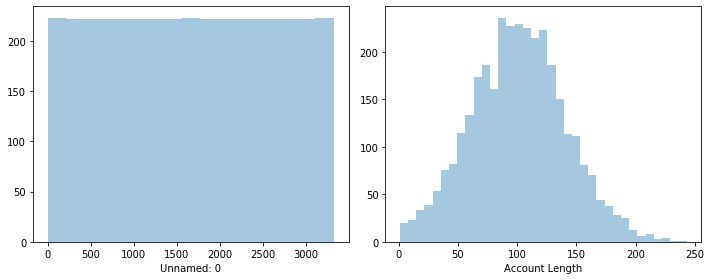

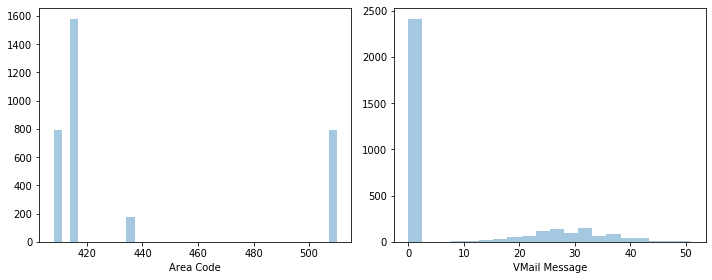

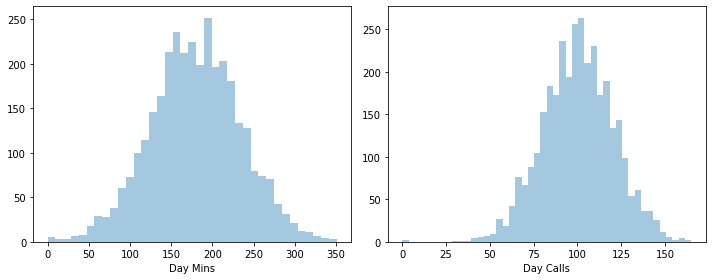

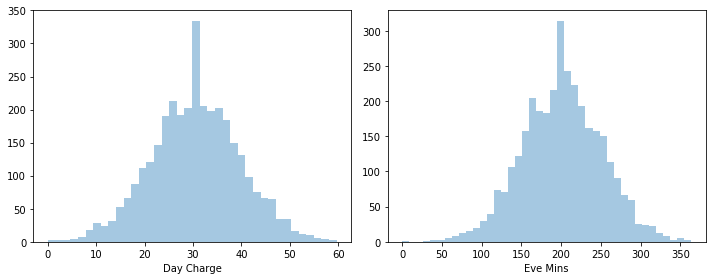

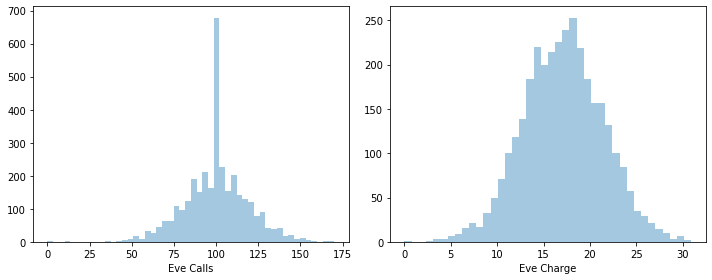

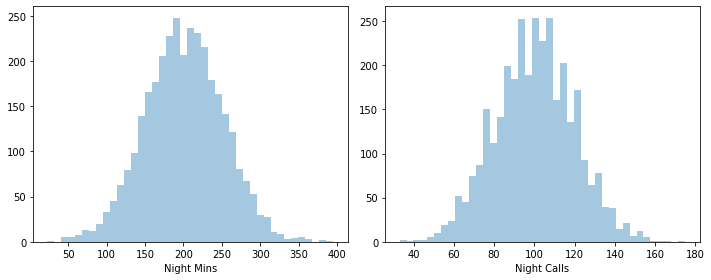

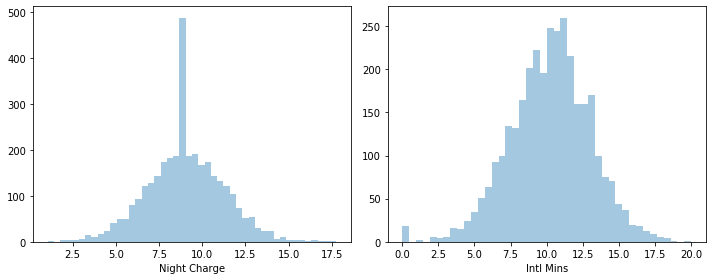

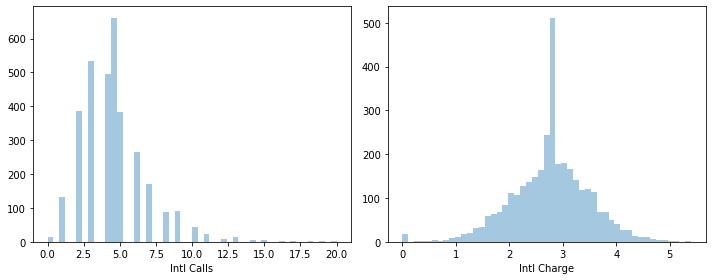

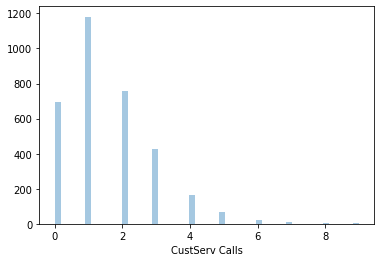

In [31]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

plot_continuous_columns(churn_df)

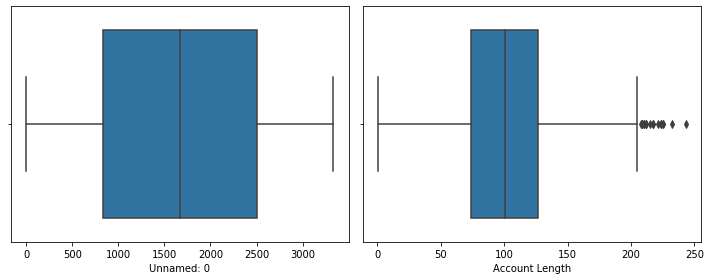

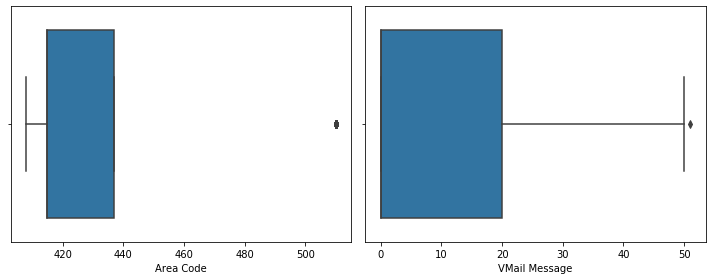

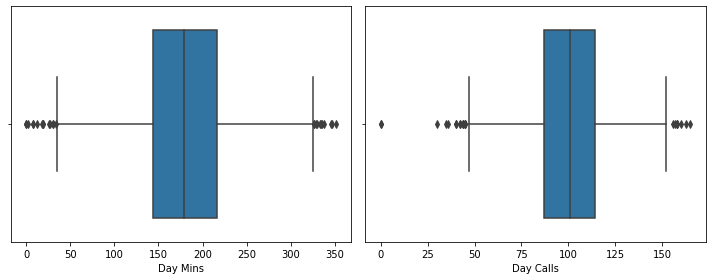

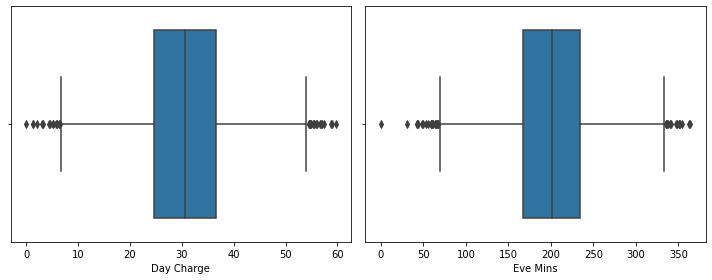

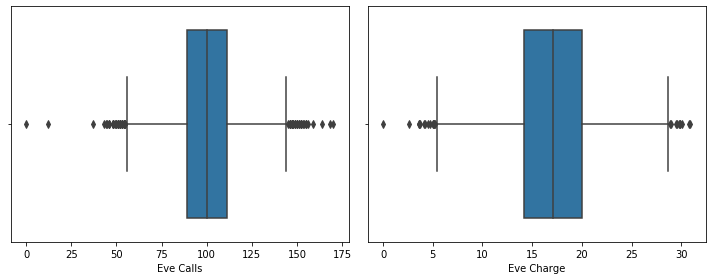

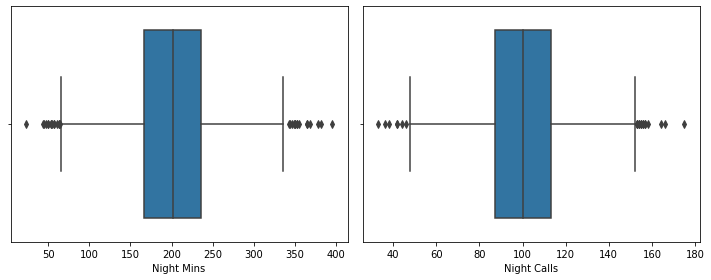

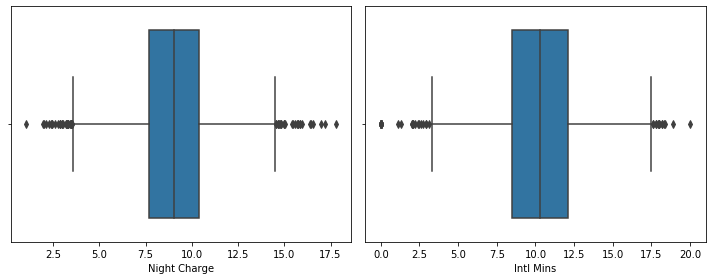

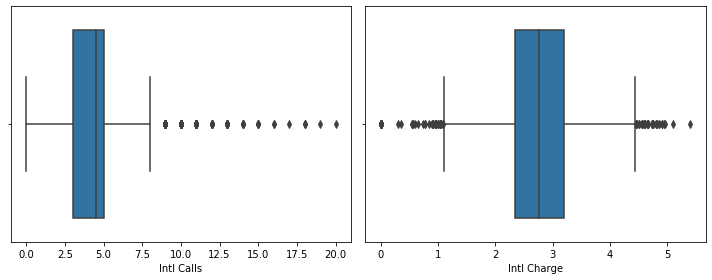

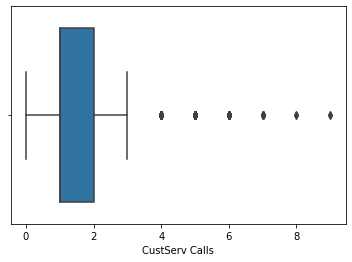

In [32]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])
            
plot_box_plots(churn_df)            

### Function to Label Encode Categorical variables

In [33]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
churn_df = dummyEncode(churn_df)

In [34]:
churn_df.drop(['Unnamed: 0'],1,inplace=True)

In [35]:
churn_df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415.0,1,2,25,265.1,110,30.56588,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,0
1,35,107,415.0,1,2,26,161.6,123,30.56588,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,0
2,31,137,415.0,1,1,0,243.4,114,30.56588,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,0
3,35,84,408.0,2,1,0,299.4,71,50.90000,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,0
4,36,75,415.0,2,1,0,166.7,113,28.34000,148.3,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3,0


### Model building for prediction

In [36]:
# Predictors
X = churn_df.iloc[:,:-1]

# Target
y = churn_df.iloc[:,-1]

In [37]:
def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.62      0.08      0.14       101

    accuracy                           0.85       667
   macro avg       0.74      0.54      0.53       667
weighted avg       0.82      0.85      0.80       667

ROC_AUC_SCORE is 0.5351869992652977


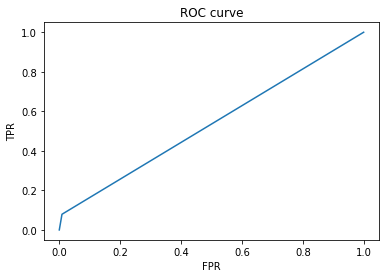

AUC Score = 53.52 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       566
           1       0.65      0.70      0.68       101

    accuracy                           0.90       667
   macro avg       0.80      0.82      0.81       667
weighted avg       0.90      0.90      0.90       667

ROC_AUC_SCORE is 0.8179162439212119


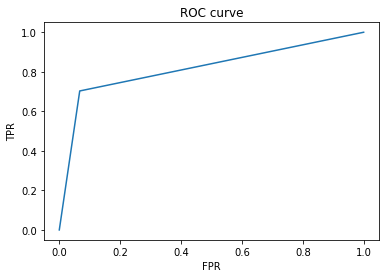

AUC Score = 81.79 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.89      0.54      0.67       101

    accuracy                           0.92       667
   macro avg       0.91      0.77      0.81       667
weighted avg       0.92      0.92      0.91       667

ROC_AUC_SCORE is 0.7660934821397335


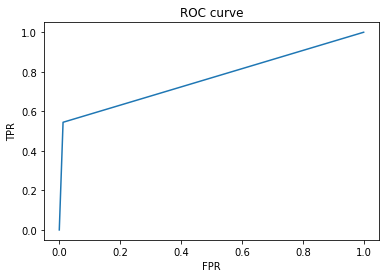

AUC Score = 76.61 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       566
           1       0.87      0.72      0.79       101

    accuracy                           0.94       667
   macro avg       0.91      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667

ROC_AUC_SCORE is 0.8516688241262288


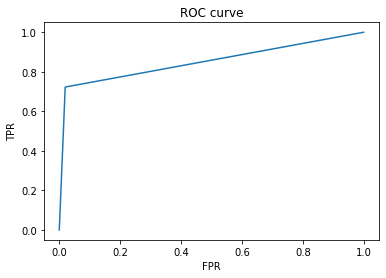

AUC Score = 85.17 %
On Model - 
Gradient Boosting


In [38]:
# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)

### Feature Selection

In [39]:
#feature selection using rfe
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Random Forest':RandomForestClassifier,'Gradient Boosting':GradientBoostingClassifier}

# Selecting 8 number of features
for i in models.items():
    feature_selection(X,y,8,i[1])

Features  to be selected for Logistic Regression are:
["Int'l Plan", 'VMail Plan', 'VMail Message', 'Eve Charge', 'Night Charge', 'Intl Mins', 'Intl Calls', 'CustServ Calls']
Features  to be selected for Random Forest are:
["Int'l Plan", 'Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins', 'Intl Mins', 'CustServ Calls']
Features  to be selected for Gradient Boosting are:
["Int'l Plan", 'VMail Message', 'Day Mins', 'Day Charge', 'Eve Charge', 'Intl Mins', 'Intl Calls', 'CustServ Calls']



## Grid-Search & Hyperparameter Tuning

### Grid search for random forest

In [40]:
def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_


grid_search_random_forrest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}

Using TensorFlow backend.


On Validation data
ROC_AUC_SCORE is 0.8467005573189936
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       857
           1       0.67      0.76      0.71       143

    accuracy                           0.91      1000
   macro avg       0.81      0.85      0.83      1000
weighted avg       0.92      0.91      0.91      1000



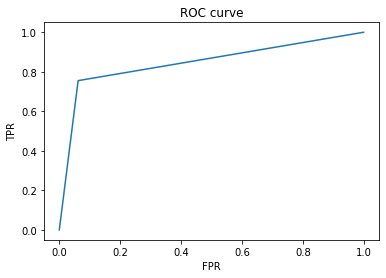

In [41]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


def grid_search_random_forrest_best(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation data')
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    



grid_search_random_forrest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using RFE

On Validation data
ROC_AUC_SCORE is 0.8216416022717072
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       857
           1       0.65      0.71      0.68       143

    accuracy                           0.90      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.91      0.90      0.91      1000



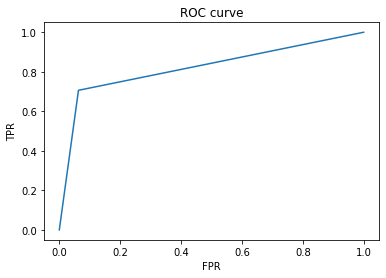

In [42]:

grid_search_random_forrest_best(X[['VMail Message', 'Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins', 'Intl Mins', 'CustServ Calls']],y)

On Validation Data
ROC_AUC_SCORE is  0.8612944814811793
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       857
           1       0.87      0.74      0.80       143

    accuracy                           0.95      1000
   macro avg       0.91      0.86      0.88      1000
weighted avg       0.95      0.95      0.95      1000



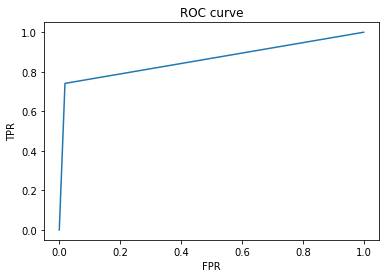

In [43]:
def grid_search_graduent_boosting(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    GB = GradientBoostingClassifier()
    
    param_grid = { 
           'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth': [4, 6, 8],
            'min_samples_leaf': [20, 50,100,150],
    }
    grid_search = GridSearchCV(GB, param_grid=param_grid)
    
    grid_search.fit(X_sm, y_sm)
    y_pred = grid_search.predict(x_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('ROC_AUC_SCORE is ',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    

grid_search_graduent_boosting(X,y)